In this file, we will train and deploy a Machine Learning Model using **Flask**. 
* When we train a machine learning model, we have to think about how we will deploy a machine learning model to serve our trained model to the available users. 
* Training a model is the most important part in machine learning, but deploying a model is a different art because we have to think a lot in the process how we will make our machine learning application available to our users. 

Here, we will train and deploy a **SMS Spam detection** machine learning model.

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('spam.csv', encoding="latin-1")
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.columns = ['class','message']

In [6]:
df['label'] = df['class'].map({'ham': 0, 'spam': 1})

In [7]:
X = df['message']
y = df['label']

In [8]:
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data

In [9]:
print(df.shape)
print(X.shape)

(5572, 3)
(5572, 8672)


In [10]:
print(len(cv.get_feature_names()))

8672


In [11]:
print(cv.vocabulary_)

{'go': 3550, 'until': 8030, 'jurong': 4350, 'point': 5920, 'crazy': 2327, 'available': 1303, 'only': 5537, 'in': 4087, 'bugis': 1751, 'great': 3634, 'world': 8489, 'la': 4476, 'buffet': 1749, 'cine': 2048, 'there': 7645, 'got': 3594, 'amore': 1069, 'wat': 8267, 'ok': 5504, 'lar': 4512, 'joking': 4318, 'wif': 8392, 'oni': 5533, 'free': 3358, 'entry': 2949, 'wkly': 8447, 'comp': 2165, 'to': 7756, 'win': 8405, 'fa': 3087, 'cup': 2386, 'final': 3207, 'tkts': 7743, '21st': 411, 'may': 4930, '2005': 402, 'text': 7595, '87121': 784, 'receive': 6297, 'question': 6190, 'std': 7230, 'txt': 7933, 'rate': 6242, 'apply': 1156, '08452810075over18': 77, 'dun': 2802, 'say': 6633, 'so': 7024, 'early': 2823, 'hor': 3927, 'already': 1042, 'then': 7640, 'nah': 5238, 'don': 2712, 'think': 7660, 'he': 3781, 'goes': 3558, 'usf': 8075, 'lives': 4665, 'around': 1207, 'here': 3831, 'though': 7680, 'freemsg': 3365, 'hey': 3841, 'darling': 2443, 'it': 4218, 'been': 1460, 'week': 8313, 'now': 5420, 'and': 1084, 'n

In [12]:
len(cv.vocabulary_)

8672

In [13]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
cv.inverse_transform(X[0])

[array(['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only',
        'in', 'bugis', 'great', 'world', 'la', 'buffet', 'cine', 'there',
        'got', 'amore', 'wat'], dtype='<U34')]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
#Naive Bayes Classifier

clf = MultinomialNB()

clf.fit(X_train,y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)

In [17]:
y_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1587
           1       0.93      0.92      0.92       252

    accuracy                           0.98      1839
   macro avg       0.96      0.95      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [19]:
clf.predict(X_test[0])

array([1], dtype=int64)

In [20]:
a = df["message"].head(1)
a

0    Go until jurong point, crazy.. Available only ...
Name: message, dtype: object

In [21]:
test = cv.transform(a)

In [22]:
test.shape

(1, 8672)

In [23]:
clf.predict(test)

array([0], dtype=int64)

In [36]:
message = pd.Series(input("Write your text: "))
message

Write your text: Free entry in 2 a wkly comp to win FA Cup fina.


0    Free entry in 2 a wkly comp to win FA Cup fina.
dtype: object

In [37]:
transform = cv.transform(message)

In [38]:
prediction = clf.predict(transform)[0]

if prediction == 0:
    print("Its not a spam message")
else:
     print("Its a spam message")


Its a spam message


### Saving our Machine Learning Model

After we train our model, we must have wondered how could we use that model without training the model. So we can save the model for future use. There is no need of training the model every time. We can save our machine learning model as follows:

In [29]:
import joblib
joblib.dump(clf, 'NB_spam_model.pkl')

['NB_spam_model.pkl']

Next time we need the same model, we can load this machine learning model as follows:

In [30]:
NB_spam_model = open('NB_spam_model.pkl','rb')
clf = joblib.load(NB_spam_model)

### Deploying a Machine Learning Model into a Web Application

After training our **sms spam detection classification**, it’s time to deploy our machine learning model. We will create a simple web application which will consist a web page which will look like a form where we can write or paste our sms. The web page will consist a submit button. When we will click the submit button it will use our machine learning model to classify whether the sms is `spam` or `ham` **(not spam)**.

First, we will create a folder for this project called **SMS-Message-Spam-Detector** , this is the directory tree inside the folder:

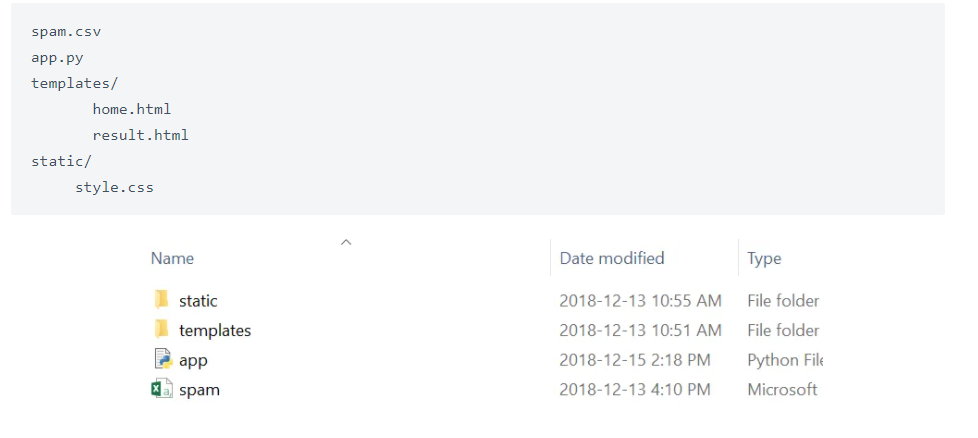

* The sub-directory **templates** is the directory in which **Flask** will look for static HTML files for rendering in the web browser, in our case, we have two html files: **home.html** and **result.html**.

* The **app.py** file will contain the main code that will be executed by the python to run our Flask web application. It includes the Machine Learning code for classifying our sms messages as `spam` or `ham`.

In [34]:
# from flask import Flask,render_template,url_for,request
# import pandas as pd 
# import pickle
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.naive_bayes import MultinomialNB
# import joblib


# app = Flask(__name__)

# @app.route('/')
# def home():
#     return render_template('home.html')

# @app.route('/predict',methods=['POST'])
# def predict():
#     df= pd.read_csv("spam.csv", encoding="latin-1")
#     df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
#     df.columns = ['class','message']
#     # Features and Labels
#     df['label'] = df['class'].map({'ham': 0, 'spam': 1})
#     X = df['message']
#     y = df['label']

#     # Extract Feature With CountVectorizer
#     cv = CountVectorizer()
#     X = cv.fit_transform(X) # Fit the Data
#     from sklearn.model_selection import train_test_split
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#     #Naive Bayes Classifier
#     from sklearn.naive_bayes import MultinomialNB

#     clf = MultinomialNB()
#     clf.fit(X_train,y_train)
#     clf.score(X_test,y_test)
#     #Alternative Usage of Saved Model
#     # joblib.dump(clf, 'NB_spam_model.pkl')
#     # NB_spam_model = open('NB_spam_model.pkl','rb')
#     # clf = joblib.load(NB_spam_model)

#     if request.method == 'POST':
#         message = request.form['message']
#         data = [message]
#         vect = cv.transform(data).toarray()
#         my_prediction = clf.predict(vect)
#     return render_template('result.html',prediction = my_prediction)



# if __name__ == '__main__':
#     app.run(debug=True)

### home.html

The following are the contents of the **home.html** file that will create a text form where a user can enter a message:

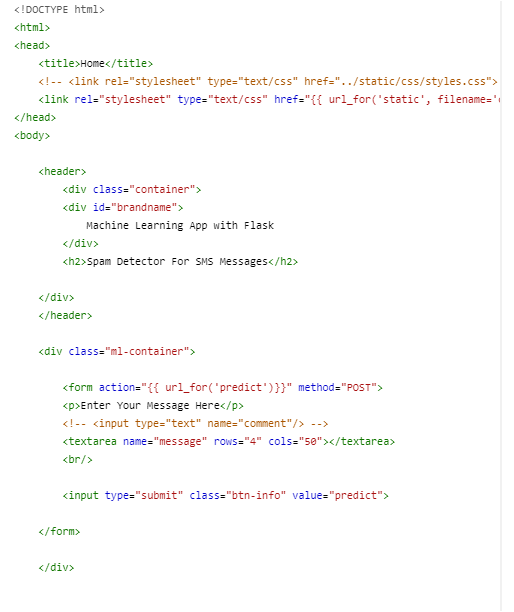

### style.css

In the header section of or html file (`home.html`), we will load `style.css` file. CSS is to determine the appearance and style of HTML documents. `style.css` has to be saved in a sub-directory called **static**, which is the default directory where **Flask** looks for static files such as **CSS**.

### result.html
Now, we will create a `result.html` file that will give us a result of our model prediction. It is the final step when we deploy a machine learning model.

After following all the steps to deploy a machine learning model, now we can simply run this program using our `app.py` file.

We will see output as follows:

https://videos.files.wordpress.com/kLm79Cwv/videoplayback_dvd.mp4